In [21]:
!pip install --upgrade matplotlib

In [2]:
import itertools
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [12]:
data_path = './sample_data.txt'

def prepare_data(data_path) -> [str]:
    """Reads data from file and list of lines"""
    reads = []
    lines = None
    with open(data_path, 'r') as f:
        lines = f.read().splitlines() 
    if not any(lines):
        return
    return [line for line in lines]

In [13]:
def split_data_into_units(data_list: [], split_char: str) -> [[]]:
    units = []
    for d in data_list:
        units.append(d.split(split_char))
    return units

In [14]:
def get_unique(data_list, ordered_list):
    flat_list = list(itertools.chain.from_iterable(data_list))
    flat_list = list(set(flat_list))
    flat_list = sorted(flat_list, key=lambda x: ordered_list.index(x) if x in ordered_list else len(ordered_list))
    return flat_list

In [15]:
def prepare_data_structure(keys) -> {}:
    data_structure = {}
    for key in keys:
        data_structure[key] = {k: 0 for k in keys}
    return data_structure

In [16]:
def calculate_cross_dict(split_data, cross_dict):
    for sequence in split_data:
        for i in range(1, len(sequence)):
            cross_dict[sequence[i-1]][sequence[i]] += 1
    return cross_dict

In [17]:
def get_cross_matrix(cross_dict, order_list):
    matrix = []
    for _, person_data in cross_dict.items():
        matrix.append([person_data[key] for key in order_list])
    return np.array(matrix, dtype=int)

In [18]:
def heat_map(cross_data: [[]], order_data: []):
    fig, ax = plt.subplots()
    im = ax.imshow(cross_data)
    
    ax.set_xticks(np.arange(len(order_data)))
    ax.set_yticks(np.arange(len(order_data)))
    ax.set_xticklabels(order_data)
    ax.set_yticklabels(order_data)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    for i in range(len(order_data)):
        for j in range(len(order_data)):
            text = ax.text(j, i, cross_data.T[j, i], ha="center", va="center", color="w")
    ax.set_title("Cross matrix for event succession")
    fig.tight_layout()
    plt.show()

In [19]:
def run():
    data_array = prepare_data(data_path)
    split_data = split_data_into_units(data_array, '>')
    
    ordered_list = ['PW', 'GM', 'AS', 'AD', 'NS', 'MA', 'TS', 'PG']
    unique_data = get_unique(split_data, ['PW', 'GM', 'AS', 'AD', 'NS', 'MA', 'TS', 'PG'])
    
    data_structure = prepare_data_structure(unique_data)
    calculated = calculate_cross_dict(split_data, data_structure)
    cross_matrix = get_cross_matrix(calculated, unique_data)
    heat_map(cross_matrix, unique_data)

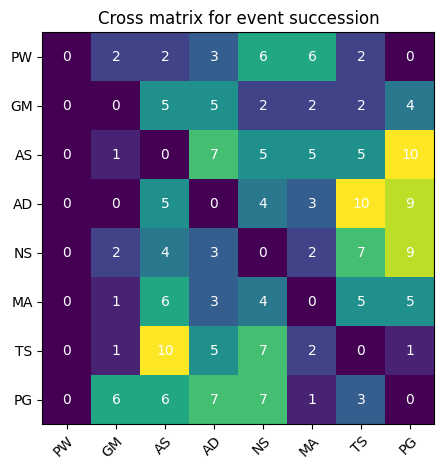

In [20]:
run()